In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve, auc, confusion_matrix

df = pd.read_csv("emails.csv")
num_samples = df.shape[0]
print(f"Örnek sayısı: {num_samples}")
num_features = df.shape[1]
print(f"Özellik sayısı: {num_features}")

Örnek sayısı: 5172
Özellik sayısı: 3002


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [3]:
df.head(110)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Email 106,1,0,1,1,3,1,23,0,0,...,0,0,0,0,0,0,0,0,0,0
106,Email 107,7,12,1,2,5,8,55,7,0,...,0,0,0,0,0,0,0,4,0,0
107,Email 108,35,32,9,23,15,33,314,0,2,...,0,0,0,6,0,0,0,4,0,1
108,Email 109,5,5,16,2,5,1,51,0,8,...,0,0,0,0,0,0,0,1,0,0


In [4]:
unique_values = df['Prediction'].unique()
unique_values

array([0, 1], dtype=int64)

In [5]:
# hedef sınıf
X = df.iloc[:, 1:-1]  
y = df.iloc[:, -1]   

In [6]:
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [7]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [8]:
# Eğitim 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
shuffler = ShuffleSplit(n_splits=3, train_size=0.8, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

#cross-validation
history = cross_validate(model, X, y, cv=shuffler, return_train_score=True)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [9]:
y_pred = model.predict(X_test)
y_pred


array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [10]:
def calculate_metrics(y_true, y_pred):
    true_positive = sum((y_true == 1) & (y_pred == 1))
    true_negative = sum((y_true == 0) & (y_pred == 0))
    false_positive = sum((y_true == 0) & (y_pred == 1))
    false_negative = sum((y_true == 1) & (y_pred == 0))

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    sensitivity = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) != 0 else 0
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0

    return precision, sensitivity, specificity, f1_score

In [11]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision, specificity, f1_score,sensitivity = calculate_metrics(y_test, y_pred)

print(f"Accuracy (Doğruluk): {accuracy}")
print(f"AUC (ROC): {roc_auc}")
print("Precision (Kesinlik):", precision)
print("Sensitivity (Hassasiyet):", sensitivity)
print("F1 Score:", f1_score)
print(f"Specificity (Özgüllük): {specificity}")

Accuracy (Doğruluk): 0.9256038647342996
AUC (ROC): 0.912461598946714
Precision (Kesinlik): 0.8613861386138614
Sensitivity (Hassasiyet): 0.8714524207011686
F1 Score: 0.9431664411366711
Specificity (Özgüllük): 0.8817567567567568


Text(0, 0.5, 'Değer')

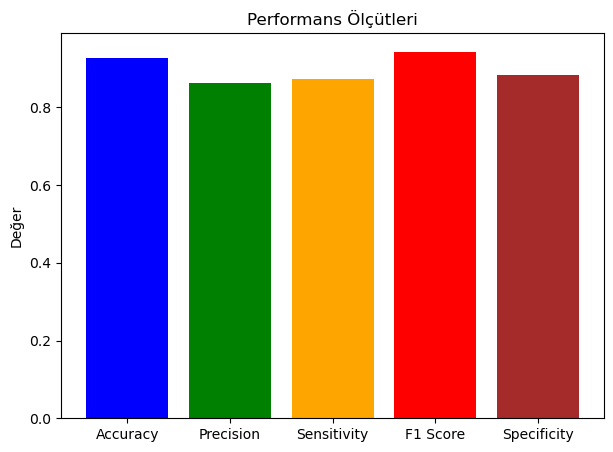

In [12]:
metrics = ['Accuracy', 'Precision', 'Sensitivity', 'F1 Score',  'Specificity']
values = [accuracy, precision, sensitivity, f1_score,  specificity]
plt.figure(figsize=(7, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'brown'])
plt.title('Performans Ölçütleri')
plt.ylabel('Değer')

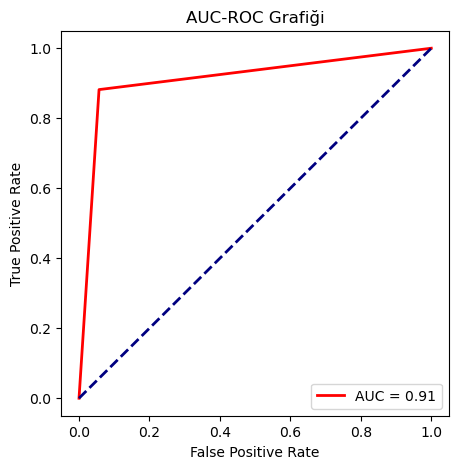

In [13]:
# AUC-ROC grafiğini çizdirin
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='red', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Grafiği')
plt.legend(loc='lower right')

Text(0, 0.5, 'Test Skoru')

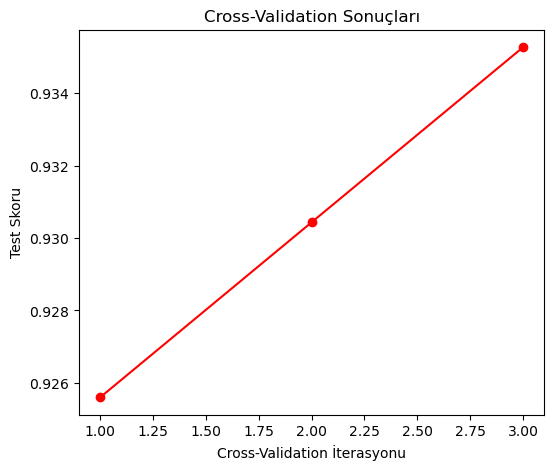

In [15]:
test_scores = history["test_score"]
plt.figure(figsize=(6, 5))
plt.plot(range(1, len(test_scores) + 1), test_scores, marker='o', linestyle='-', color='red')
plt.title('Cross-Validation Sonuçları')
plt.xlabel('Cross-Validation İterasyonu')
plt.ylabel('Test Skoru')